# CIFAR-10

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

In [44]:
data = cifar10.load_data()

## Train, Test

In [45]:
(X_train,y_train), (X_test,y_test) = data

In [46]:
X_train.shape

(50000, 32, 32, 3)

In [47]:
X_train[0].shape

(32, 32, 3)

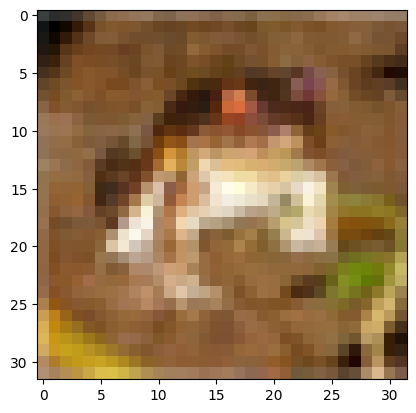

In [50]:
plt.imshow(X_train[0])

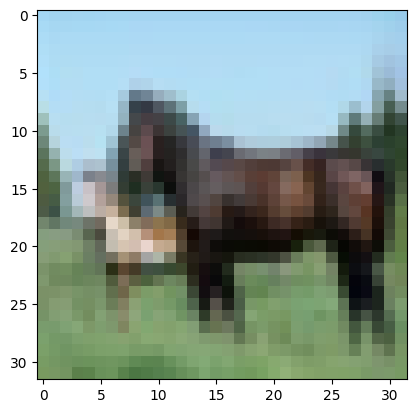

In [51]:
plt.imshow(X_train[12])

In [52]:
y_train.shape

(50000, 1)

In [53]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_test.shape

(10000, 1)

## Preprocessing

In [55]:
X_train[0].max()

255

In [56]:
X_train[0].min()

0

In [57]:
X_train = X_train / 255
X_test  = X_test / 255

## One Hot Encoding

In [58]:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)

In [59]:
y_train.shape

(50000, 10)

In [60]:
y_test.shape

(10000, 10)

## Define Model

In [61]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [62]:
model = Sequential()

# Conv Layer
model.add(Conv2D(input_shape=X_train.shape[1:], filters=32, kernel_size=(4,4), activation="relu"))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(units=10, activation="softmax"))

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 64,298
Trainable params: 64,298
Non-trainable params: 0
_________________________________________________________________
